
# 🎵 Music Mood & Tempo Analyzer

This is a simple and clever data analysis project that classifies songs into different **moods** using their audio features (like valence, energy, danceability) and analyzes **tempo** patterns across those moods.

The project is built entirely with **Pandas**, **NumPy**, and **Matplotlib** – no machine learning, just smart logic and clean visualizations.

---

## 📁 Files

| File Name               | Description                                 |
|------------------------|---------------------------------------------|
| `data.csv`             | Original song dataset with audio features   |
| `data_with_moods.csv`  | Enhanced dataset with mood and tempo class  |
| `main.py`              | Main script for data processing & plotting  |

---

## 🚀 Features

### ✅ Data Cleaning
- Dropped rows with missing values
- Reset index for consistency

### 🧠 Mood Classification Logic
Each song is classified into one of the following **moods** using thresholds of:
- `valence` (positivity)
- `energy`
- `danceability`

**Mood categories include**:
`Happy`, `Sad`, `Relaxed`, `Angry`, `Romantic`, `Energetic`, `Excited`, `Calm`, `Neutral`

### 📊 NumPy-Based Summary
For each mood, it computes **summary statistics** of tempo:
- Mean, Min, Max, Std Dev, Count

### 📈 Data Visualizations
- Bar chart of mood distribution
- Mood distribution by musical **mode** (major/minor)
- Histogram of tempo
- Boxplot of tempo by mood
- Categorization into: `Slow`, `Medium`, `Fast` tempos


## 📦 Requirements

```bash
pip install pandas numpy matplotlib


In [1]:
# Load necessary libraries and inspecting the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data.csv')

# View first 5 rows
print(df.head())

# Check available columns
print(df.columns)


   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

Drop rows with missing values and Reset index just to keep it clean

In [2]:
df.dropna()
df.reset_index(drop=True, inplace=True) # Reset index after dropping rows with NaN values


 Define Mood Classification Logic

In [3]:
def classify_mood(row):
    v= row['valence']
    e= row['energy']
    d= row['danceability']
    if v > 0.5 and e > 0.5 and d > 0.5:
        return 'Happy'
    elif v < 0.5 and e < 0.5 and d < 0.5:
        return 'Sad'
    elif v > 0.5 and e < 0.5:
        return 'Relaxed'
    elif v < 0.5 and e > 0.5:
        return 'Angry'
    elif v > 0.5 and d < 0.5:
        return 'Romantic'
    elif v < 0.5 and d > 0.5:
        return 'Energetic'
    elif e > 0.5 and d < 0.5:
        return 'Excited'
    elif e < 0.5 and d > 0.5:
        return 'Calm'
    else:
        return 'Neutral'
df['Mood'] = df.apply(classify_mood, axis=1)


Summary Statistics of each Mood

In [4]:
tempos = df['tempo'].values
moods = df['Mood'].values

# Unique moods
unique_moods = np.unique(moods)

# Summary dictionary
summary_stats = {}

for mood in unique_moods:
    # Mask for current mood
    mask = moods == mood
    mood_tempos = tempos[mask]
    
    # Compute stats using NumPy
    count = mood_tempos.size
    mean = np.mean(mood_tempos)
    min_val = np.min(mood_tempos)
    max_val = np.max(mood_tempos)
    std_dev = np.std(mood_tempos)

    # Store
    summary_stats[mood] = {
        "count": count,
        "mean": mean,
        "min": min_val,
        "max": max_val,
        "std_dev": std_dev
    }

# Display results
for mood, stats in summary_stats.items():
    print(f"\nMood: {mood}")
    for stat, value in stats.items():
        print(f"{stat.capitalize()}: {value:.2f}")
    


Mood: Angry
Count: 762.00
Mean: 124.72
Min: 60.39
Max: 200.03
Std_dev: 25.51

Mood: Energetic
Count: 139.00
Mean: 114.78
Min: 59.38
Max: 200.75
Std_dev: 25.06

Mood: Excited
Count: 1.00
Mean: 147.12
Min: 147.12
Max: 147.12
Std_dev: 0.00

Mood: Happy
Count: 796.00
Mean: 120.01
Min: 72.50
Max: 199.73
Std_dev: 24.50

Mood: Neutral
Count: 5.00
Mean: 122.87
Min: 94.03
Max: 174.04
Std_dev: 28.20

Mood: Relaxed
Count: 85.00
Mean: 116.51
Min: 64.99
Max: 209.69
Std_dev: 26.65

Mood: Romantic
Count: 100.00
Mean: 134.24
Min: 71.61
Max: 219.33
Std_dev: 38.12

Mood: Sad
Count: 129.00
Mean: 113.70
Min: 47.86
Max: 207.97
Std_dev: 30.76


Plot Mood Distribution

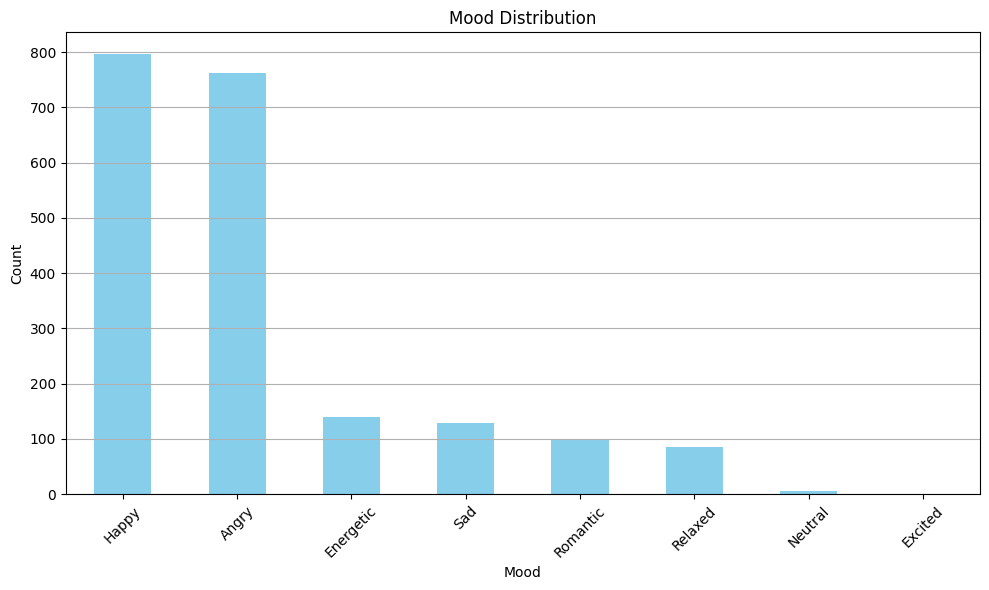

In [5]:
mood_counts = df['Mood'].value_counts()
plt.figure(figsize=(10, 6)) # Set figure size
mood_counts.plot(kind='bar', color='skyblue')
plt.title('Mood Distribution')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()



Average Mood by Mode (Major vs Minor)

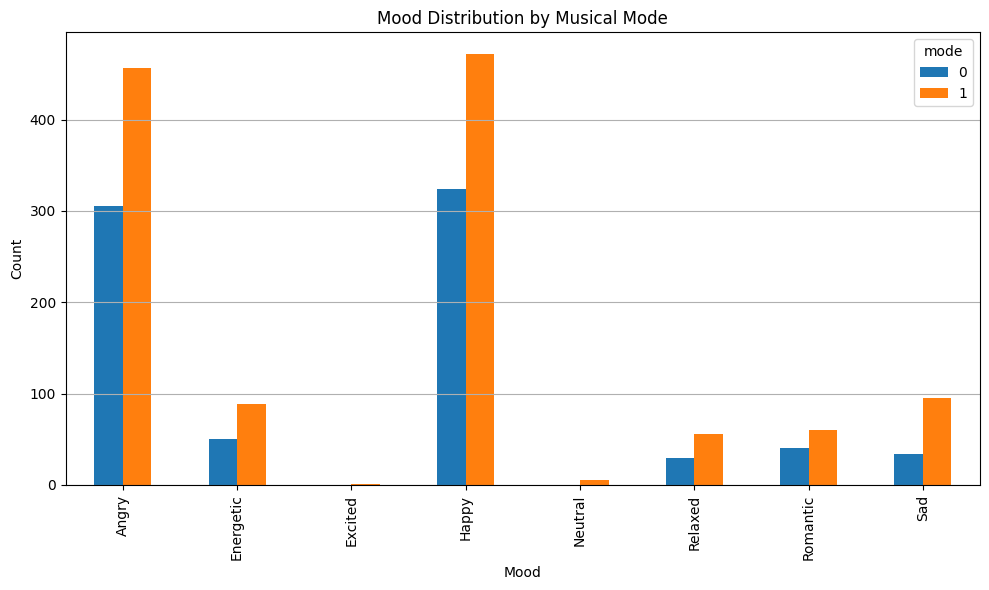

In [6]:
# Group by mode (0 = minor, 1 = major)
mode_moods = df.groupby(['mode', 'Mood']).size().fillna(0).unstack()

# Plot
mode_moods.T.plot(kind='bar', figsize=(10, 6))
plt.title("Mood Distribution by Musical Mode")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Basic Statistics of Tempo


In [7]:
# Summary statistics for tempo
print(df['tempo'].describe())




count    2017.000000
mean      121.603272
std        26.685604
min        47.859000
25%       100.189000
50%       121.427000
75%       137.849000
max       219.331000
Name: tempo, dtype: float64


Histogram of Tempo

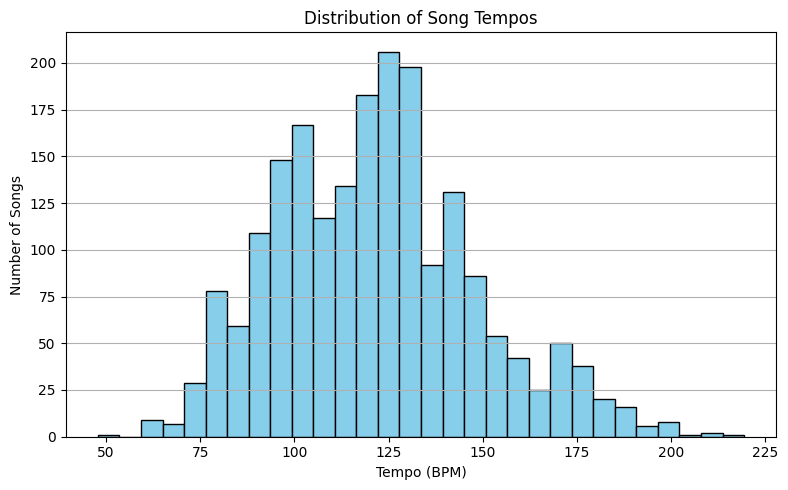

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['tempo'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Tempos')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Number of Songs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Boxplot of Tempo

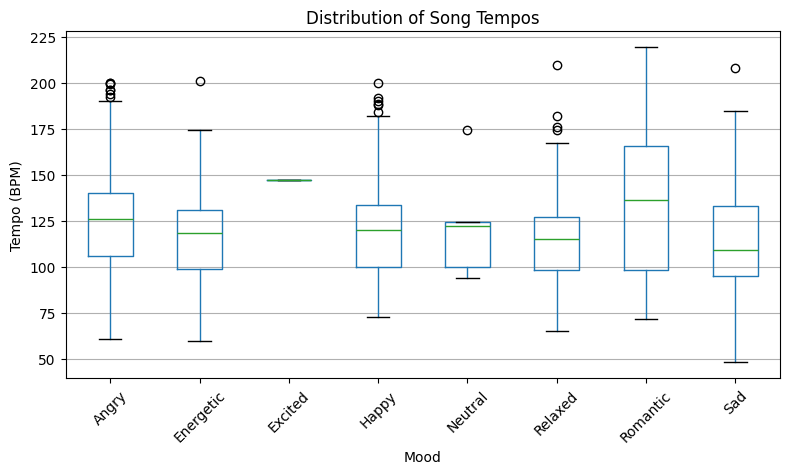

In [13]:
df.boxplot(column='tempo', by='Mood', grid=False, figsize=(8, 5))
plt.title('Distribution of Song Tempos')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Mood')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Classify Songs by Tempo Range

In [10]:
def tempo_category(bpm):
    if bpm < 80:
        return 'Slow'
    elif bpm < 120:
        return 'Medium'
    else:
        return 'Fast'
df['Tempo Category'] = df['tempo'].apply(tempo_category)    

In [11]:
# View first 5 rows
print(df.head())

# Check available columns
print(df.columns)

# Save the modified DataFrame to a new CSV file
df.to_csv('data_with_moods.csv', index=False)






   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  \
0             4.0    0.286       1        Mask Off            Future   
1 